# Итоговая работа по Python

## 1. Загрузить файл hr.csv

In [1]:
#сделаем необходимые импорты и загрузим датасет

In [40]:
import pandas as pd
import numpy as np
from scipy import stats as stats
import statistics
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
hr_df = pd.read_csv('HR.csv') #изучим датасет
hr_df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Итак, у нас датафрейм HR-отдела: 14999 строк, 10 столбцов. Каждая строка является записью о конкретном сотруднике, столбцы есть параметры по каждому из них.  NaN значений нет, нам повезло. 2 столбца имеют тип данных object. Первые 2000 записей - в данный момент уже уволенные сотрудники (хотя, может, кого-то приняли обратно, но то, скорее всего будет другая запись с соответствующим id)

In [5]:
stsf_lvl = hr_df['satisfaction_level']  # объявим переменные
lst_evlt = hr_df['last_evaluation']
num_prj = hr_df['number_project']
avg_mnt_hrs = hr_df['average_montly_hours']
tim_sp_cpny = hr_df['time_spend_company']
wrk_acd = hr_df['Work_accident']
lft = hr_df['left']
prm_lst_5y = hr_df['promotion_last_5years']
sls = hr_df['sales']
slr = hr_df['salary']

## 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

   Задание №2, вернее его часть, как нельзя лучше можно выполнить методом describe()

In [6]:
hr_df.describe(exclude  = [np.object]) #хотя и по умолчанию describe не посчитал статистики для object.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
hr_df.mode() #Поле average_montly_hours имеет сразу два одинаково наиболее встречающихся значения: 135 и 156 часов. 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


Поля sales и salary вывели наиболее частотными значениями sales и low. Для полноты картины выведем уникальные значения этих полей:

In [8]:
print(f'col_sales: {hr_df["sales"].unique()},    col_salary: {hr_df["salary"].unique()}')

col_sales: ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD'],    col_salary: ['low' 'medium' 'high']


 Строка выше говорит нам о том, что из категорий персонала (вкл. уволенных) наиболее часто встречающимися являются представители отдела продаж. 
 Наиболее часто встречающийся среди персонала (вкл. 2000 уволенных) уровень з/п - "низкий".

## 3. Рассчитать и визуализировать корреляционную матрицу для переменных

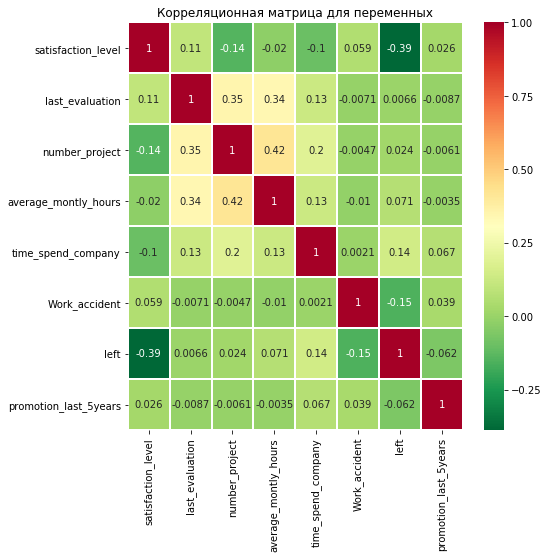

In [9]:
plt.subplots(figsize=(7.5, 7.5)) 
plt.title("Корреляционная матрица для переменных")
sns.heatmap(hr_df.corr(), annot=True, cmap='RdYlGn_r',linewidths=1)      #voilà

voilà

## 4. Визуализировать несколько взаимосвязей между переменными

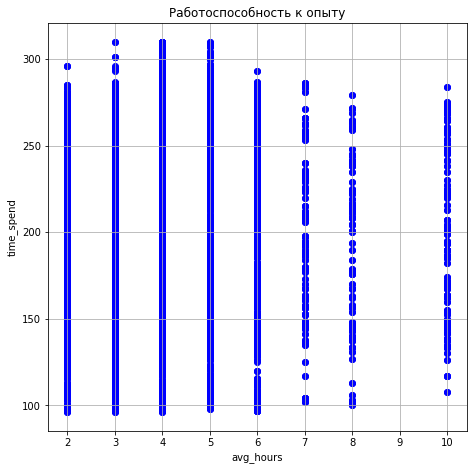

In [10]:
plt.subplots(figsize=(7.5, 7.5)) 
plt.title('Работоспособность к опыту')
plt.xlabel('avg_hours')
plt.ylabel('time_spend')
plt.grid(True)
plt.scatter(tim_sp_cpny,avg_mnt_hrs, c = 'blue')

График зависимости стажа от среднемесячного количества рабочих часов свидетельствует об:
1. бо́льшей загруженности работников 2-4 года работы.
2. так сложилось исторически, что в данный момент в компании нет ни одного сотрудника со стажем в 9 лет. 

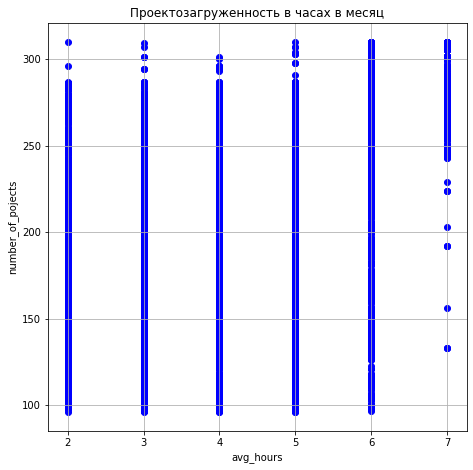

In [11]:
plt.subplots(figsize=(7.5, 7.5)) 
plt.title('Проектозагруженность в часах в месяц')
plt.xlabel('avg_hours')
plt.ylabel('number_of_pojects')
plt.grid(True)
plt.scatter(num_prj, avg_mnt_hrs, c = 'blue')

In [12]:
hr_df[hr_df['number_project'] == 7]['average_montly_hours'].min()

133

График зависимости  от среднемесячного количества рабочих часов свидетельствует о:
меньшем минимальном пороге рабочих часов для работников с 7 проектами, - 133 часа (и то значение, по сути, - выброс). Подавляющее большинство 7-проектных проводит за работой более 200 часов в месяц

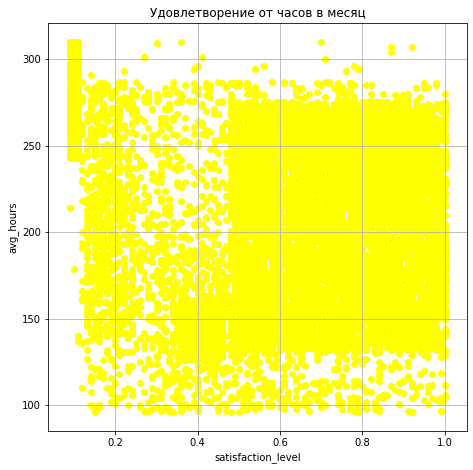

In [13]:
plt.subplots(figsize=(7.5, 7.5)) 
plt.title('Удовлетворение от часов в месяц')
plt.xlabel('satisfaction_level')
plt.ylabel('avg_hours')
plt.grid(True)
plt.scatter(stsf_lvl, avg_mnt_hrs, c = 'yellow')

График выше свидетельствует о наличии довольно многочисленной группы сотрудников, имеющих удовлетворение 0,47 и выше (по шкале от 0 до 1) и проводящих за работой от 140 часов в месяц и выше. Такая категория сотрудников подавляющим большинством не является, но это некий "средний уровень". Также можно выделить когорту совершенно неудовлетворённых работой, и проводящих на ней очень много времени до 300 часов и более. 

## 5. с использованием t-test статистики проверить взаимосвязи между несколькими переменными.

Для применения t-test статистики  желательно (т.к. есть допущения к применению t-статистики и для других распределений)  убедиться в том, что данные по которым мы будем считать t-критерий, распределены нормально.

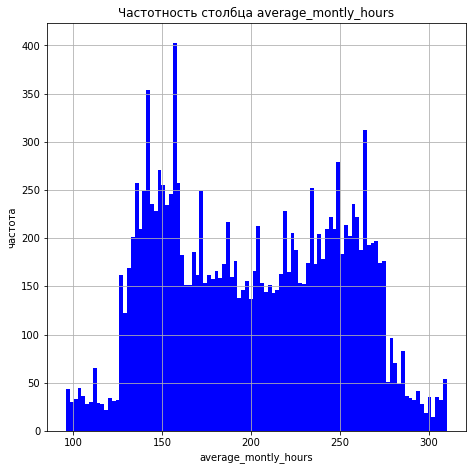

In [14]:
plt.subplots(figsize=(7.5, 7.5)) 
n, bins, patches = plt.hist(hr_df['average_montly_hours'], 100, facecolor='b')
plt.title('Частотность столбца average_montly_hours')
plt.xlabel('average_montly_hours')
plt.ylabel('частота')
plt.grid(True)

с некоторым допущением, примем распределение за пригодное к t-test

Гипотеза: сотрудники отдела продаж работают столько же, сколько и все (...ну нравится мне работать с полем среднего кол-ва рабочих часов, в трудовую инспекцию пойду наверное)))

в первую очередь, чтобы анализировать только действующих сотрудников, уточним нашу выборку:

In [15]:
actual_stuff = hr_df[hr_df['left'] == 0]

In [16]:
stats.ttest_ind(
   actual_stuff[actual_stuff['sales'] == 'sales']['average_montly_hours'],
   actual_stuff[actual_stuff['sales'] != 'sales']['average_montly_hours']
)

Ttest_indResult(statistic=0.7344023431557384, pvalue=0.4627186297678898)

Уровень p-value даёт нам основание принять нулевую гипотезу. Её легко проверить:

In [17]:
salers = actual_stuff[actual_stuff['sales'] == 'sales']['average_montly_hours'].mean()
non_salers = actual_stuff[actual_stuff['sales'] != 'sales']['average_montly_hours'].mean()
print(f'среднее кол-во рабочих часов в месяц отдела продаж: {round(salers,2)}, остальных: {round(non_salers,2)}')

среднее кол-во рабочих часов в месяц отдела продаж: 199.57, остальных: 198.87


Ещё гипотеза: люди хотят, в основном, денег (или уровень удовлетворенности сотрудников и их зарплата)

In [18]:
stats.ttest_ind(
    actual_stuff[actual_stuff['salary'] == 'low']['satisfaction_level'],
    actual_stuff[actual_stuff['salary'] == 'high']['satisfaction_level']
)

Ttest_indResult(statistic=2.276898581788068, pvalue=0.022825680749007052)

Низкое значение p-value даёт основание гипотезу отвергнуть. Хотя и сперва существует тенденция к увеличению удовлетворённости с ростом зарплаты, люди, всё же хотят, в основном не денег, и получая их, уровень удовлетворённость даже немного снижается

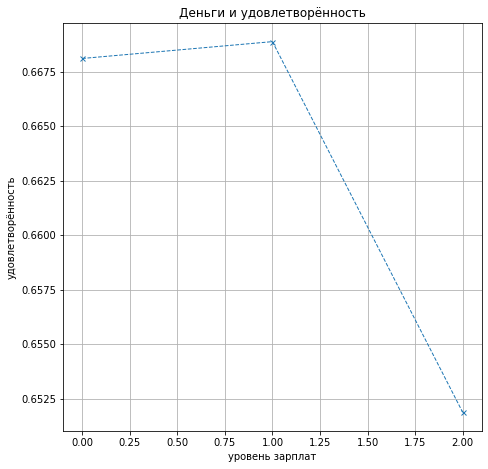

In [19]:
lw = actual_stuff[actual_stuff['salary'] == 'low']['satisfaction_level'].mean()
md = actual_stuff[actual_stuff['salary'] == 'medium']['satisfaction_level'].mean()
hg = actual_stuff[actual_stuff['salary'] == 'high']['satisfaction_level'].mean()
plt.subplots(figsize=(7.5, 7.5)) 
plt.title('Деньги и удовлетворённость')
plt.xlabel('уровень зарплат')
plt.ylabel('удовлетворённость')
plt.grid(True)
plt.plot([lw,md,hg], marker='x', linestyle='dashed', linewidth=1, markersize=5) 

## 6. Рассчитать сколько работников работает в каждом департаменте.

Здесь я решил не ходить лёгким путём, и , хотя позже воспользовался методами groupby и agg, оставил в задании 6 для разнообразия способ вывода нужной матрицы a-la Microsoft Power BI Power Query

In [20]:
dep_cnt = actual_stuff.pivot_table(
    index = 'sales', aggfunc = 'count'
    ).rename(columns = {'time_spend_company':'stuff_quantity'}).T   
dep_cnt = dep_cnt.iloc[8:,].T
def calc_percentage1(x):
    perctg = float(x/dep_cnt['stuff_quantity'].sum())*100 
    return round(perctg,2)
dep_cnt['percentage'] = dep_cnt.apply(
    calc_percentage1, axis = 1)
dep_cnt.style.bar(align='mid')

,stuff_quantity,percentage
sales,,
IT,954,8.35
RandD,666,5.83
accounting,563,4.93
hr,524,4.59
management,539,4.72
marketing,655,5.73
product_mng,704,6.16
sales,3126,27.35
support,1674,14.65


В лидерах по численности отделы продаж и АХО(?, судя по наличию отделов IT и support)

## 7. Показать распределение сотрудников по зарплатам.

На этот раз не будем усложнять и воспользуемся методами groupby и agg. В моей версии итоговой представлены старые синтаксические варианты методов pandas groupby и agg.Параметр sort = False в groupby задан согласно рекомандации документации pandas

In [21]:
wage_cnt = actual_stuff.groupby(
    'salary',sort = False)['number_project'].agg(['count']).sort_values(by=['count'])
def calc_percentage2(x):
    perctg = float(x/wage_cnt['count'].sum())*100 
    return round(perctg,2)
wage_cnt['percentage'] = wage_cnt.apply(calc_percentage2, axis = 1)
wage_cnt

,count,percentage
salary,,
high,1155,10.11
medium,5129,44.88
low,5144,45.01


Из 11428 сотрудников примерно 10% получают высокую з/п, остальные 90% - почти пополам, - среднюю и низкую

## 8. Показать распределение сотрудников по зарплатам совместно с департаментами

In [22]:
dep_wage_cnt = actual_stuff.groupby(
    ['salary', 'sales'], sort = False)['last_evaluation'].agg(
    ['count']).sort_values(
    by=['count'], ascending = False).rename(columns = {'sales':'department'})
def calc_percentage3(x):
    perctg = float(x/dep_wage_cnt['count'].sum())*100 
    return round(perctg,2)
dep_wage_cnt['percentage'] = dep_wage_cnt.apply(calc_percentage3, axis = 1)
dep_wage_cnt.reset_index().rename(
    columns = {'sales':'department','count':'stuff_quantity'}).style.bar(align = 'mid')

,salary,department,stuff_quantity,percentage
0,medium,sales,1469,12.85
1,low,sales,1402,12.27
2,low,technical,994,8.7
3,medium,technical,853,7.46
4,medium,support,784,6.86
5,low,support,757,6.62
6,medium,IT,438,3.83
7,low,IT,437,3.82
8,low,product_mng,346,3.03
9,medium,RandD,310,2.71


Наиболее представительные среди сотрудников группы по параметру "отдел-уровень зарплаты", - продажи-низкий и средний уровни. Наименее представительные, - высокооплачиваемый персонал отделов hr и RandD

## 9. Узнаём, сколько сотрудников покинули компанию.

3571

In [23]:
l = len(hr_df) - len(actual_stuff)
l

3571

## 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

Выделии в отдельный датафрейм уволившихся (-енных)

In [24]:
loss_stuff = hr_df[hr_df['left'] == 1]

В нашем датасете как раз есть измерение для анализа причин увольнения - это уровень удовлетворённости. Протестируем же, насколько эта метрика коррелирует с увольнениями. Итак, гипотеза №1 (казалось бы очевидное утверждение, но всё же): сотрудники с низким уровнем удовлетворённости чаще покидают компанию

In [25]:
stats.ttest_ind(
    loss_stuff['satisfaction_level'],
    actual_stuff['satisfaction_level']
)

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

In [26]:
stats.ttest_1samp(
    loss_stuff['satisfaction_level'],
    actual_stuff['satisfaction_level'].mean()
)

Ttest_1sampResult(statistic=-51.3303486754725, pvalue=0.0)

Вышеприведённая корреляционная матрица для переменных (heatmap) давала высокую корреляцию (-0,39) на пересечении "left" и "satisfaction_level". t-test дал потрясающий результат: p-value = 0.0 от слова совсем. Интересно посмотреть на частотное распределение satisfaction_level, чтобы понять, целесообразно ли его вообще подвергать t-test

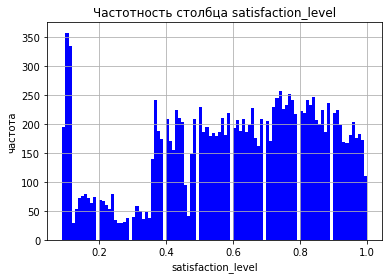

In [27]:
n, bins, patches = plt.hist(hr_df['satisfaction_level'], 100, facecolor='b')
plt.title('Частотность столбца satisfaction_level')
plt.xlabel('satisfaction_level')
plt.ylabel('частота')
plt.grid(True)

...мда. у наших целевых выборок распределение еще более замысловатое...не очень-то и целесообразен t-test. ОК. воспользуемся старым добрым топорным методом проверки гипотезы: сравним среднее значение для каждой выборки

In [28]:
loss_stuff['satisfaction_level'].mean()

0.44009801176140917

In [29]:
actual_stuff['satisfaction_level'].mean()

0.666809590479516

Ответ очевиден: метрика уровня удовлетворённости даёт основание считать сотрудников с низким таковым близкими к увольнению

Матрица корреляций имеет также значимое пересечение между "time_spend_company" и "left". Выдвинем гипотезу: сотрудники увольнялись когда им нечего было терять в компании: наработанных связей, комфортных отношений в коллективе, высокий авторитет среди коллег и начальства. В общем тогда, когда мало проработали в компании в принципе

In [30]:
stats.ttest_1samp(
    loss_stuff['time_spend_company'],
    actual_stuff['time_spend_company'].mean()
)

Ttest_1sampResult(statistic=30.344952648144773, pvalue=3.8135536324917118e-180)

In [31]:
stats.ttest_ind(
    loss_stuff['time_spend_company'],
    actual_stuff['time_spend_company']
)

Ttest_indResult(statistic=17.924210234916142, pvalue=4.207680457692835e-71)

И снова p-value очень близок к нулю. Отвергаем нулевую гипотезу. Время, проведённое в компании очень слабо влияет на решение об увольнении. Проверим:

In [32]:
loss_stuff['time_spend_company'].mean()

3.876505180621675

In [33]:
actual_stuff['time_spend_company'].mean()

3.3800315015750786

Гипотеза № 3. Сотрудники увольнялись из-за низкого уровня оплаты труда

In [34]:
wage_grby_act = actual_stuff.groupby(
    'salary')['number_project'].agg(['count'])
wage_grby_lss = loss_stuff.groupby(
    'salary')['number_project'].agg(['count'])

In [35]:
wage_grby_act

,count
salary,
high,1155
low,5144
medium,5129


In [36]:
wage_grby_lss

,count
salary,
high,82
low,2172
medium,1317


In [37]:
stats.ttest_ind(
    wage_grby_lss['count'],
    wage_grby_act['count']
)

Ttest_indResult(statistic=-1.7947580052970216, pvalue=0.1471332863683946)

In [38]:
stats.ttest_1samp(
    wage_grby_lss['count'],
    wage_grby_act['count'].mean()
)

Ttest_1sampResult(statistic=-4.317179595143227, pvalue=0.04968869782716327)

P-value на этот раз свидетельствует о верности нулевой гипотезы: низкий уровень оплаты труда мог стать причиной увольнения персонала. Проверим:

In [39]:
wage_cnt2 = loss_stuff.groupby(
    'salary',sort = False)['number_project'].agg(['count']).sort_values(by=['count'])
def calc_percentage4(x):
    perctg = float(x/wage_cnt2['count'].sum())*100 
    return round(perctg,2)
wage_cnt2['percentage'] = wage_cnt2.apply(calc_percentage4, axis = 1)
wage_cnt2

,count,percentage
salary,,
high,82,2.30
medium,1317,36.88
low,2172,60.82


Числа говорят сами за себя: в когорте выбывших доля низкооплачиваемых составила более 60% (в оставшихся - около 45%), тогда как, высокооплачиваемых - только 2% (в оставшихся - около 10%)

# СПАСИБО ЗА ВНИМАНИЕ!